In [1]:
import pandas as pd
import numpy as np
from string import punctuation 
import re

In [64]:
import config
from transformers import AutoTokenizer

2021-10-12 11:59:51.059654: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [65]:
data = pd.read_csv('input/train_folds.csv')

In [66]:
data.tail()

,id,context,question,answer_text,answer_start,language,kfold,answers
7724,6611,विद्युत आवेश के परिवर्तन की समय दर के रूप में ...,इलेक्ट्रोस्टैटिक और चुंबकीय बल के योग के रूप क...,इलेक्ट्रोस्टैटिक बल,328,hindi,-1,"{'answer_start': [328], 'text': ['इलेक्ट्रोस्ट..."
7725,6612,उस आयतन के लिए प्रासंगिक क्रॉस-सेक्शनल क्षेत्र...,संरचनाओं में तनाव का कारण क्या बनता है?,तनाव टेंसर,343,hindi,-1,"{'answer_start': [343], 'text': ['तनाव टेंसर']}"
7726,6613,उस आयतन के लिए प्रासंगिक क्रॉस-सेक्शनल क्षेत्र...,किसी वस्तु के आयतन में क्रॉस सेक्शन क्षेत्र की...,दबाव की शर्तें,118,hindi,-1,"{'answer_start': [118], 'text': ['दबाव की शर्त..."
7727,6614,उस आयतन के लिए प्रासंगिक क्रॉस-सेक्शनल क्षेत्र...,सामान्य ताकतों से क्या जुड़ा है?,दबाव की शर्तें,118,hindi,-1,"{'answer_start': [118], 'text': ['दबाव की शर्त..."
7728,6615,उस आयतन के लिए प्रासंगिक क्रॉस-सेक्शनल क्षेत्र...,आयतन में क्षेत्र की गणना करते समय दबाव की क्या...,नियम-निष्ठता,101,hindi,-1,"{'answer_start': [101], 'text': ['नियम-निष्ठता']}"


In [3]:
# data = data[data['kfold']!=-1]

In [67]:
data['len_question'] = data['question'].apply(lambda x: len(x))
data['len_answer'] = data['answer_text'].apply(lambda x: len(x.strip()))
data['len_context'] = data['context'].apply(lambda x: len(x))

In [68]:
data['answer_end'] = data['answer_start']+data['len_answer'] 


In [69]:
data['check_ans'] = data.apply(lambda x: x['context'][x['answer_start']:x['answer_end']], axis=1)

In [70]:
data['checker'] = (data['answer_text']==data['check_ans'])

In [71]:
data['checker'].value_counts()

True     7727
False       2
Name: checker, dtype: int64

In [72]:
data[data.checker==False][['answer_text','check_ans']].values

array([['பிரகதீசுவரர் கோயில் ', 'பிரகதீசுவரர் கோயில்'],
       ["काले सरसों (ब्रैसिका निग्रा, भूरे रंग के भारतीय सरसों (ब्रैसिका जुनसिया) और सफेद सरसों (''ब्रैसिका हिर्टा) से",
        'काले सरसों (ब्रैसिका निग्रा, भूरे रंग के भारतीय सरसों (ब्रैसिका जुनसिया) और सफेद सरसों (" ब्रैसिका हिर्टा) से']],
      dtype=object)

In [73]:
data.head()

,id,context,question,answer_text,answer_start,language,kfold,answers,len_question,len_answer,len_context,answer_end,check_ans,checker
0,903deec17,ஒரு சாதாரண வளர்ந்த மனிதனுடைய எலும்புக்கூடு பின...,மனித உடலில் எத்தனை எலும்புகள் உள்ளன?,206,53,tamil,3,"{'answer_start': [53], 'text': ['206']}",36,3,4340,56,206,True
1,d9841668c,காளிதாசன் (தேவநாகரி: कालिदास) சமஸ்கிருத இலக்கி...,காளிதாசன் எங்கு பிறந்தார்?,காசுமீரில்,2358,tamil,0,"{'answer_start': [2358], 'text': ['காசுமீரில்']}",26,10,7647,2368,காசுமீரில்,True
2,29d154b56,சர் அலெக்ஸாண்டர் ஃபிளெமிங் (Sir Alexander Flem...,பென்சிலின் கண்டுபிடித்தவர் யார்?,சர் அலெக்ஸாண்டர் ஃபிளெமிங்,0,tamil,4,"{'answer_start': [0], 'text': ['சர் அலெக்ஸாண்ட...",32,26,4970,26,சர் அலெக்ஸாண்டர் ஃபிளெமிங்,True
3,41660850a,"குழந்தையின் அழுகையை நிறுத்தவும், தூங்க வைக்கவ...",தமிழ்நாட்டில் குழந்தைகளை தூங்க வைக்க பாடும் பா...,தாலாட்டு,68,tamil,4,"{'answer_start': [68], 'text': ['தாலாட்டு']}",75,8,8493,76,தாலாட்டு,True
4,b29c82c22,சூரியக் குடும்பம் \nசூரியக் குடும்பம் (Solar S...,பூமியின் அருகில் உள்ள விண்மீன் எது?,சூரியனும்,585,tamil,4,"{'answer_start': [585], 'text': ['சூரியனும்']}",35,9,9954,594,சூரியனும்,True


In [74]:
data['len_question'].max(),  data['len_question'].min()

(307, 8)

In [75]:
data['len_answer'].max(),  data['len_answer'].min()

(395, 1)

In [76]:
data['len_context'].max(), data['len_context'].min(), 

(49815, 51)

In [79]:
data[data['len_context']==data['len_context'].min()]['context'].values[0]

'ऍन॰जी॰सी॰ ६९३४ (NGC 6934) - यह एक गोल तारागुच्छ है।'

In [80]:
data[data['len_context']==data['len_context'].min()]

,id,context,question,answer_text,answer_start,language,kfold,answers,len_question,len_answer,len_context,answer_end,check_ans,checker
2972,1859,ऍन॰जी॰सी॰ ६९३४ (NGC 6934) - यह एक गोल तारागुच्...,एनजीसी 6934 क्या है?,एक गोल तारागुच्छ,31,hindi,-1,"{'answer_start': [31], 'text': ['एक गोल तारागु...",20,16,51,47,एक गोल तारागुच्छ,True
5926,4813,डैनियल क्रैग (२ मार्च १९६८) एक अंग्रेज़ अभिनेत...,अंग्रेजी अभिनेता का जन्म कब हुआ था?\n,२ मार्च १९६८,14,hindi,-1,"{'answer_start': [14], 'text': ['२ मार्च १९६८']}",37,12,51,26,२ मार्च १९६८,True


In [107]:
data[data['len_answer']==data['len_answer'].min()]

,id,context,question,answer_text,answer_start,language,kfold,answers,len_question,len_answer,len_context,answer_end,before_answer,new_start_positon,after_answer,new_end_positon,new_context
87,f64641ba1,யானை பாலூட்டி வகையைச் சேர்ந்த ஒரு தாவர உண்ணி (...,ஆண் யானை சராசரி எத்தனை மீட்டர் உயரம் இருக்கும்,3,2284,tamil,2,"{'answer_start': [2284], 'text': ['3']}",46,1,12242,2285,யானை பாலூட்டி வகையைச் சேர்ந்த ஒரு தாவர உண்ணி (...,2284,மீட்டர் உயரமும் 6000 கிலோகிராம் எடையும் கொண்டவ...,2285,யானை பாலூட்டி வகையைச் சேர்ந்த ஒரு தாவர உண்ணி (...
152,6b4c9d95e,ஒரு சாதாரண வளர்ந்த மனிதனுடைய எலும்புக்கூடு பின...,மனிதனின் காலில் எத்தனை எலும்புகள் உள்ளன?,8,106,tamil,0,"{'answer_start': [106], 'text': ['8']}",40,1,4246,107,ஒரு சாதாரண வளர்ந்த மனிதனுடைய எலும்புக்கூடு பின...,107,) எண்ணிக்கையான எலும்புகளைக் கொண்டிருக்கும். இந...,108,ஒரு சாதாரண வளர்ந்த மனிதனுடைய எலும்புக்கூடு பின...
241,f7bd94bb9,கணிதத்தில் பெருக்கல் (Multiplication) என்பது ஒ...,கணிதத்தில் பெருக்குதல் சின்னம் எது?,x,1625,tamil,1,"{'answer_start': [1625], 'text': ['x']}",35,1,11827,1626,கணிதத்தில் பெருக்கல் (Multiplication) என்பது ஒ...,1570,"4 =12; 12 ஐ 3 ஆல் வகுக்க 4 உம், 4 ஆல் வகுக்க 3...",1571,கணிதத்தில் பெருக்கல் (Multiplication) என்பது ஒ...
299,20aac3ea4,Part of a series onChristianity\nJesusChrist\n...,கிறிஸ்தவ மதத்தில் எத்தனை குழுக்கள் உள்ளன?,3,1553,tamil,1,"{'answer_start': [1553], 'text': ['3']}",41,1,15799,1554,Part of a series onChristianity JesusChrist Na...,1480,3.3%) உலகின் பெரிய சமயமாகக் காணப்படுகிறது. கிற...,1481,Part of a series onChristianity JesusChrist Na...
369,9d274ae3c,फ्लोरीन एक रासायनिक तत्व है। यह आवर्त सारणी (p...,फ्लोरीन की परमाणु संख्या क्या है?,9,166,hindi,2,"{'answer_start': [166], 'text': ['9']}",33,1,2270,167,फ्लोरीन एक रासायनिक तत्व है। यह आवर्त सारणी (p...,167,) प्राप्त है और तीन रेडियोधर्मिता समस्थानिक (भ...,168,फ्लोरीन एक रासायनिक तत्व है। यह आवर्त सारणी (p...
553,c63870d02,पृथ्वी पर पाए जाने वाले तत्वों में कार्बन या प...,कार्बन का प्रतीक क्या है?,C,120,hindi,2,"{'answer_start': [120], 'text': ['C']}",25,1,3173,121,पृथ्वी पर पाए जाने वाले तत्वों में कार्बन या प...,120,"तथा परमाणु संख्या ६, मात्रा संख्या १२ एवं परमा...",121,पृथ्वी पर पाए जाने वाले तत्वों में कार्बन या प...


In [81]:
data['before_answer'] = data.apply(lambda x: " ".join(x['context'][:x['answer_start']].split()),axis=1)
data['new_start_positon'] = [len(x.strip())+1 for x in data['before_answer']]
data['after_answer'] = data.apply(lambda x: " ".join(x['context'][x['answer_end']:].split()),axis=1)
data['new_end_positon'] = data['new_start_positon']+data['len_answer'] 

In [122]:
# data['before_answer'] = data.apply(lambda x: re.sub(r'\[\d+\]'," ",x['context'][:x['answer_start']]),axis=1)
# data['new_start_positon'] = [len(x.strip())+1 for x in data['before_answer']]
# data['after_answer'] = data.apply(lambda x: re.sub(r'\[\d+\]'," ",x['context'][x['answer_end']:]),axis=1)
# data['after_answer'] = data.apply(lambda x: " ".join(x['context'][x['answer_end']:].split()),axis=1)
# data['new_end_positon'] = data['new_start_positon']+data['len_answer'] 

In [123]:
# data['new_context'] = data['before_answer'].map(str)+" "+data['answer_text'].map(str)+" "+data['after_answer'].map(str)

In [82]:
data['new_context'] = data.apply(lambda x: ''.join(x['before_answer'].strip()+" "+x['check_ans'].strip()+" "+x['after_answer'].strip()),axis=1)

In [83]:
data['new_answer_text'] = data.apply(lambda x: x['new_context'][x['new_start_positon']:x['new_end_positon']],axis=1)

In [84]:
data['flag']= (data['new_answer_text']==data['answer_text'])

In [85]:
data['flag'].value_counts()

True     7727
False       2
Name: flag, dtype: int64

In [94]:
data[data.index==1109]

,id,context,question,answer_text,answer_start,language,kfold,answers,len_question,len_answer,...,answer_end,check_ans,checker,before_answer,new_start_positon,after_answer,new_end_positon,new_context,new_answer_text,flag
1109,26f356026,स्वामी निगमानन्द परमहंस (18 अगस्त 1880 - 29 नव...,स्वामी निगमानन्द परमहंस के तन्त्र गुरु कौन थे?,बामाक्षेपा,2691,hindi,2,"{'answer_start': [2691], 'text': ['बामाक्षेपा']}",46,10,...,2701,बामाक्षेपा,True,स्वामी निगमानन्द परमहंस (18 अगस्त 1880 - 29 नव...,2678,"हें। एक दिन रात को नलिनीकांत ने देखा, उनकी शय्...",2688,स्वामी निगमानन्द परमहंस (18 अगस्त 1880 - 29 नव...,बामाक्षेपा,True


In [95]:
data[data.index==1109]['context'].values[0][2691:2701]

'बामाक्षेपा'

In [96]:
data[data.index==1109]['new_context'].values[0][2678:2688]

'बामाक्षेपा'

In [14]:
data[data.flag == False].tail()

,id,context,question,answer_text,answer_start,language,kfold,answers,len_question,len_answer,...,answer_end,check_ans,checker,before_answer,new_start_positon,after_answer,new_end_positon,new_context,new_answer_text,flag
340,1431f3af8,"தஞ்சைப் பிரகதீசுவரர் கோயில் என்றும், தஞ்சைப் ப...",தஞ்சாவூர் மாவட்டத்தின் மிகப்பெரிய கோயில் எது?,பிரகதீசுவரர் கோயில்,8,tamil,0,"{'answer_start': [8], 'text': ['பிரகதீசுவரர் க...",45,19,...,27,பிரகதீசுவரர் கோயில்,False,தஞ்சைப்,8,"என்றும், தஞ்சைப் பெரிய கோயில் (""Big temple"") அ...",27,"தஞ்சைப் பிரகதீசுவரர் கோயில் என்றும், தஞ்சைப் ப...",பிரகதீசுவரர் கோயில்,False


<AxesSubplot:>

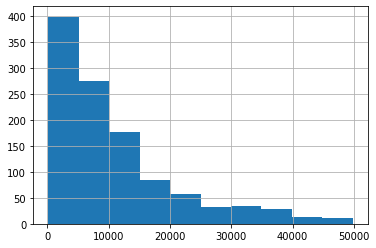

In [33]:
data['len_context'].hist()

In [34]:
data['len_context'].describe()

count     1114.000000
mean     10999.168761
std      10359.706014
min        176.000000
25%       3778.750000
50%       7553.500000
75%      14720.500000
max      49815.000000
Name: len_context, dtype: float64

<AxesSubplot:>

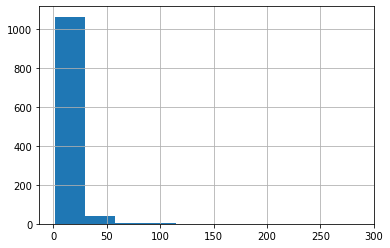

In [35]:
data['len_answer'].hist()

In [36]:
data['len_answer'].describe()

count    1114.000000
mean       12.744165
std        15.527678
min         1.000000
25%         6.000000
50%        10.000000
75%        15.000000
max       286.000000
Name: len_answer, dtype: float64

In [49]:
data.columns

Index(['id', 'context', 'question', 'answer_text', 'answer_start', 'language',
       'kfold', 'answers', 'len_question', 'len_answer', 'len_context',
       'answer_end', 'check_ans', 'checker', 'before_answer',
       'new_start_positon', 'after_answer', 'new_end_positon', 'new_context',
       'new_answer_text', 'flag', 'new_answers'],
      dtype='object')

In [97]:
data['new_answers'] = data.apply(lambda x : {'answer_start':[x['new_start_positon']],'text':[x['new_answer_text']]},axis=1)

In [98]:
final_data = data[['id','new_context','question','new_answer_text','new_start_positon','language','kfold','new_answers']]

In [99]:
final_data.columns = ['id', 'context', 'question', 'answer_text', 'answer_start', 'language','kfold', 'answers']

In [100]:
final_data.head()

,id,context,question,answer_text,answer_start,language,kfold,answers
0,903deec17,ஒரு சாதாரண வளர்ந்த மனிதனுடைய எலும்புக்கூடு பின...,மனித உடலில் எத்தனை எலும்புகள் உள்ளன?,206,53,tamil,3,"{'answer_start': [53], 'text': ['206']}"
1,d9841668c,காளிதாசன் (தேவநாகரி: कालिदास) சமஸ்கிருத இலக்கி...,காளிதாசன் எங்கு பிறந்தார்?,காசுமீரில்,2350,tamil,0,"{'answer_start': [2350], 'text': ['காசுமீரில்']}"
2,29d154b56,சர் அலெக்ஸாண்டர் ஃபிளெமிங் (Sir Alexander Fle...,பென்சிலின் கண்டுபிடித்தவர் யார்?,சர் அலெக்ஸாண்டர் ஃபிளெமிங்,1,tamil,4,"{'answer_start': [1], 'text': ['சர் அலெக்ஸாண்ட..."
3,41660850a,"குழந்தையின் அழுகையை நிறுத்தவும், தூங்க வைக்கவு...",தமிழ்நாட்டில் குழந்தைகளை தூங்க வைக்க பாடும் பா...,தாலாட்டு,67,tamil,4,"{'answer_start': [67], 'text': ['தாலாட்டு']}"
4,b29c82c22,சூரியக் குடும்பம் சூரியக் குடும்பம் (Solar Sys...,பூமியின் அருகில் உள்ள விண்மீன் எது?,சூரியனும்,582,tamil,4,"{'answer_start': [582], 'text': ['சூரியனும்']}"


In [101]:
tamil_translated = pd.read_csv('input/squad_translated_tamil.csv')

In [102]:
data.shape

(7729, 22)

In [103]:
tamil_translated.shape

(3567, 4)

In [104]:

tamil_translated['answer_start'] = tamil_translated['answer_start'].astype(int)
tamil_translated['language'] ='tamil'
tamil_translated['kfold'] = -2
tamil_translated['answers'] =tamil_translated.apply(lambda x : {'answer_start':[x['answer_start']],'text':[x['answer_text']]},axis=1)


In [108]:
tamil_translated['id'] = [i for i in range(len(data),(len(data)+len(tamil_translated)))]

In [109]:
len(tamil_translated) , len(data)

(3567, 7729)

In [111]:
tamil_translated = tamil_translated[final_data.columns]

In [113]:
tamil_translated.head()

,id,context,question,answer_text,answer_start,language,kfold,answers
0,7729,"மாகாணமானது பாரம்பரியமாக ""மீன் மற்றும் அரிசி நி...",மாகாணத்தின் இரண்டாவது முக்கிய பயிர் என்ன?,கோதுமை,133,tamil,-2,"{'answer_start': [133], 'text': ['கோதுமை']}"
1,7730,Gregorian சீர்திருத்தம் இரண்டு பகுதிகளைக் கொண்...,சந்திர காலண்டரைப் பயன்படுத்தி என்ன கணக்கிடப்பட...,ஈஸ்டர் தேதி,219,tamil,-2,"{'answer_start': [219], 'text': ['ஈஸ்டர் தேதி']}"
2,7731,அ. டோங்க்கோபா மிங் நீதிமன்றத்தில் தோன்றும் மறு...,மிங் நீதிமன்றம் சாங்க்கபாவிற்கு இரண்டாவது கோரி...,1413,352,tamil,-2,"{'answer_start': [352], 'text': ['1413']}"
3,7732,"1919 ஆம் ஆண்டில், ஐரிஷ் ஹோம் ஆட்சிக்கு தாமதங்க...",அயர்லாந்தின் எத்தனை மாவட்டங்கள் வட அயர்லாந்தில...,ஆறு,816,tamil,-2,"{'answer_start': [816], 'text': ['ஆறு']}"
4,7733,அந்த யுத்தம் தவிர்க்க முடியாதது என்பதை உணர்ந்த...,ஆஸ்திரியா என்ன பிராந்தியத்தை திரும்பப் பெற முட...,ஆஸ்திரியா பிரான்சுடன் ஒரு கூட்டணியை உருவாக்கிய...,213,tamil,-2,"{'answer_start': [213], 'text': ['ஆஸ்திரியா பி..."


In [136]:
final_data.head()

,id,context,question,answer_text,answer_start,language,kfold,answers
0,903deec17,ஒரு சாதாரண வளர்ந்த மனிதனுடைய எலும்புக்கூடு பின...,மனித உடலில் எத்தனை எலும்புகள் உள்ளன?,206,53,tamil,3,"{'answer_start': [53], 'text': ['206']}"
1,d9841668c,காளிதாசன் (தேவநாகரி: कालिदास) சமஸ்கிருத இலக்கி...,காளிதாசன் எங்கு பிறந்தார்?,காசுமீரில்,2350,tamil,0,"{'answer_start': [2350], 'text': ['காசுமீரில்']}"
2,29d154b56,சர் அலெக்ஸாண்டர் ஃபிளெமிங் (Sir Alexander Fle...,பென்சிலின் கண்டுபிடித்தவர் யார்?,சர் அலெக்ஸாண்டர் ஃபிளெமிங்,1,tamil,4,"{'answer_start': [1], 'text': ['சர் அலெக்ஸாண்ட..."
3,41660850a,"குழந்தையின் அழுகையை நிறுத்தவும், தூங்க வைக்கவு...",தமிழ்நாட்டில் குழந்தைகளை தூங்க வைக்க பாடும் பா...,தாலாட்டு,67,tamil,4,"{'answer_start': [67], 'text': ['தாலாட்டு']}"
4,b29c82c22,சூரியக் குடும்பம் சூரியக் குடும்பம் (Solar Sys...,பூமியின் அருகில் உள்ள விண்மீன் எது?,சூரியனும்,582,tamil,4,"{'answer_start': [582], 'text': ['சூரியனும்']}"


In [137]:
final_export = pd.concat([final_data,tamil_translated],axis=0)

In [115]:
data.language.value_counts()

hindi    7361
tamil     368
Name: language, dtype: int64

In [138]:
final_export.shape

(11296, 8)

In [118]:
final_export.language.value_counts()

hindi    7361
tamil    3935
Name: language, dtype: int64

In [120]:
data.kfold.value_counts()

-1    6615
 0     223
 1     223
 2     223
 3     223
 4     222
Name: kfold, dtype: int64

In [119]:
final_export.kfold.value_counts()

-1    6615
-2    3567
 0     223
 1     223
 2     223
 3     223
 4     222
Name: kfold, dtype: int64

In [139]:
final_export = final_export.sample(frac=1).reset_index(drop=True)

In [144]:
final_export.kfold.value_counts()

-1    6615
-2    3567
 0     223
 1     223
 2     223
 3     223
 4     222
Name: kfold, dtype: int64

In [3]:
for fold in range(0,1):
    print(fold)

0


In [146]:
final_export['external'].value_counts()

1    10182
0     1114
Name: external, dtype: int64

In [145]:
final_export['external'] = [1 if x <0 else 0 for x in final_export['kfold']]

In [149]:
final_export.to_csv('input/all_data.csv',index=False)

In [134]:
final_export.head ()

,id,context,question,answer_text,answer_start,language,kfold,answers,len_question,len_answer,...,check_ans,checker,before_answer,new_start_positon,after_answer,new_end_positon,new_context,new_answer_text,flag,new_answers
0,6174,"सविनय अवज्ञा के कुछ रूपों, जैसे कि अवैध बहिष्क...",ब्राउनली का तर्क के अनुसार कभी-कभी लोग कैसा व्...,सीमित दबाव,414,hindi,-1,"{'answer_start': [414], 'text': ['सीमित दबाव']}",100.0,10.0,...,सीमित दबाव,True,"सविनय अवज्ञा के कुछ रूपों, जैसे कि अवैध बहिष्क...",414.0,"बनाना ज़रूरी हो सकता है।"" प्लोशेयर संगठन ने फाट...",424.0,"सविनय अवज्ञा के कुछ रूपों, जैसे कि अवैध बहिष्क...",सीमित दबाव,True,"{'answer_start': [414], 'text': ['सीमित दबाव']}"
1,656327e9c,ऋतुविज्ञान या मौसम विज्ञान (Meteorology) कई वि...,मौसम के अध्ययन को क्या कहा जाता है?,ऋतुविज्ञान या मौसम विज्ञान,0,hindi,2,"{'answer_start': [0], 'text': ['ऋतुविज्ञान या ...",35.0,26.0,...,ऋतुविज्ञान या मौसम विज्ञान,True,,1.0,(Meteorology) कई विधाओं को समेटे हुए विज्ञान ह...,27.0,ऋतुविज्ञान या मौसम विज्ञान (Meteorology) कई व...,ऋतुविज्ञान या मौसम विज्ञान,True,"{'answer_start': [1], 'text': ['ऋतुविज्ञान या ..."
2,3989,प्रैडर-विली सिंड्रोम का कोई इलाज नहीं है।हालां...,व्यवहार की समस्याओं में मदद करने वाले दो प्रका...,परामर्श और दवाएं,358,hindi,-1,"{'answer_start': [358], 'text': ['परामर्श और द...",76.0,16.0,...,परामर्श और दवाएं,True,प्रैडर-विली सिंड्रोम का कोई इलाज नहीं है।हालां...,358.0,कुछ व्यवहारिक समस्याओं से मदद कर सकती हैं।,374.0,प्रैडर-विली सिंड्रोम का कोई इलाज नहीं है।हालां...,परामर्श और दवाएं,True,"{'answer_start': [358], 'text': ['परामर्श और द..."
3,7990,கலப்பு கால உலகம் ஒரு உலோகமாக இருக்கும் அணுக்கள...,மேட்ரிக்ஸ் மற்றும் கரைப்பான் என்ன மற்ற பெயர்கள்?,முதன்மை உலோக,92,tamil,-2,"{'answer_start': [92], 'text': ['முதன்மை உலோக']}",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5175,साक्स का जन्म १० दिसंबर १८९१ को बर्लिन में एक ...,साक्स ने किस वर्ष पलायन किया?\n,१९४०,245,hindi,-1,"{'answer_start': [245], 'text': ['१९४०']}",31.0,4.0,...,१९४०,True,साक्स का जन्म १० दिसंबर १८९१ को बर्लिन में एक ...,245.0,में बर्लिन से बच कर वो स्वीडन पहुंच गई। साक्स ...,249.0,साक्स का जन्म १० दिसंबर १८९१ को बर्लिन में एक ...,१९४०,True,"{'answer_start': [245], 'text': ['१९४०']}"


In [3]:
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""

    def __init__(self, patience=7, verbose=False,metric="loss"):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement. 
                            Default: False
        """
        self.patience = patience
        self.verbose = verbose
        self.metric = metric
        
        self.counter = 0
        self.best_score = None
        self.monitor_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.loss_ = []
        self.monitor_ = []
        self.monitor_val_min = -np.Inf

    def __call__(self, val_loss,monitor_metric_val):

        
        score = -val_loss
        monitor_metric = monitor_metric_val
        self.loss_.append(score)
        self.monitor_.append(monitor_metric)
        
        
        
        if self.best_score is None:
            self.best_score = score
            self.monitor_score = monitor_metric
            
            self.save_checkpoint(val_loss,monitor_metric_val)
            
        elif score > 1.2 * np.max(self.loss_) and monitor_metric == np.max(self.monitor_):
            

            self.best_score = score
            self.monitor_score = monitor_metric
            self.save_checkpoint(val_loss,monitor_metric_val)
            
            
        elif score < self.best_score :
           
            self.counter += 1
            print(
                f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
            
        else:
            self.best_score = score
            self.monitor_score = monitor_metric
            self.save_checkpoint(val_loss,monitor_metric_val)
            self.counter = 0

    def save_checkpoint(self, val_loss,monitor_metric_val):
        '''Saves model when validation loss decrease.'''
        print(np.max(self.loss_) ,self.best_score  ,"//",self.loss_)
        
        
        if self.verbose:
            if self.metric == "loss":
                print( f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
            else :
                print( f'Jaccard score increased ({self.monitor_val_min:.6f} --> {monitor_metric_val:.6f}).  Saving model ...')
         
        self.monitor_val_min = monitor_metric_val
        self.val_loss_min = val_loss
        print(f"Saving model checkpoint to self.output_path.")
        
    def get_best_jaccard(self):
        return self.monitor_val_min 


In [4]:
train_l=[1.44,.667,.44,.30,.19,.12]
valid_l =[.277,.234,.263,.322,.354,.381]
jacc_l = [.637,.673,.690,.690,.672,.750]

0.69

In [8]:
early_stopping = EarlyStopping(patience=3 ,verbose=True,metric="loss")


for epoch in range(6):
    
    train_loss = train_l[epoch]

    test_loss = valid_l[epoch]

    jaccard = jacc_l[epoch]



    print(f"EPOCH : {epoch + 1}/{6}")
    print(f"| Train Loss = {train_loss} | Valid Loss = {test_loss}| Jaccard Score = {jaccard}|")
     

    early_stopping(val_loss= test_loss, monitor_metric_val=jaccard)

    
    if early_stopping.early_stop:
        print("Early stopping")
        break
        
    cc = early_stopping.get_best_jaccard()
print(cc)

EPOCH : 1/6
| Train Loss = 1.44 | Valid Loss = 0.277| Jaccard Score = 0.637|
-0.277 -0.277 // [-0.277]
Validation loss decreased (inf --> 0.277000).  Saving model ...
Saving model checkpoint to self.output_path.
EPOCH : 2/6
| Train Loss = 0.667 | Valid Loss = 0.234| Jaccard Score = 0.673|
-0.234 -0.234 // [-0.277, -0.234]
Validation loss decreased (0.277000 --> 0.234000).  Saving model ...
Saving model checkpoint to self.output_path.
EPOCH : 3/6
| Train Loss = 0.44 | Valid Loss = 0.263| Jaccard Score = 0.69|
-0.234 -0.263 // [-0.277, -0.234, -0.263]
Validation loss decreased (0.234000 --> 0.263000).  Saving model ...
Saving model checkpoint to self.output_path.
EPOCH : 4/6
| Train Loss = 0.3 | Valid Loss = 0.322| Jaccard Score = 0.69|
EarlyStopping counter: 1 out of 3
EPOCH : 5/6
| Train Loss = 0.19 | Valid Loss = 0.354| Jaccard Score = 0.672|
EarlyStopping counter: 2 out of 3
EPOCH : 6/6
| Train Loss = 0.12 | Valid Loss = 0.381| Jaccard Score = 0.75|
EarlyStopping counter: 3 out of 3


In [28]:
-.26 > -.2808

True

In [35]:
.69 > 0.673*1.025

True

In [42]:
0.69*1.025

0.7072499999999999

In [9]:
for i, j in enumerate(range(-2,0)):
    print(i,j)

0 -2
1 -1


In [4]:
## checking cleaned data 
cleaned_data = pd.read_csv('input/Cleaned_Chaii.csv')

In [5]:
cleaned_data['len_context'] = cleaned_data['context'].apply(lambda x: len(x))

In [6]:
cleaned_data.head()

,id,context,question,answer_text,answer_start,language,lengths,len_context
0,903deec17,ஒரு சாதாரண வளர்ந்த மனிதனுடைய எலும்புக்கூடு பின...,மனித உடலில் எத்தனை எலும்புகள் உள்ளன?,206,53,tamil,3,4246
1,d9841668c,காளிதாசன் (தேவநாகரி: कालिदास) சமஸ்கிருத இலக்கி...,காளிதாசன் எங்கு பிறந்தார்?,காசுமீரில்,2350,tamil,10,7568
2,29d154b56,சர் அலெக்ஸாண்டர் ஃபிளெமிங் (Sir Alexander Flem...,பென்சிலின் கண்டுபிடித்தவர் யார்?,சர் அலெக்ஸாண்டர் ஃபிளெமிங்,0,tamil,26,4947
3,41660850a,"குழந்தையின் அழுகையை நிறுத்தவும், தூங்க வைக்கவு...",தமிழ்நாட்டில் குழந்தைகளை தூங்க வைக்க பாடும் பா...,தாலாட்டு,4965,tamil,8,8100
4,b29c82c22,சூரியக் குடும்பம் சூரியக் குடும்பம் (Solar Sys...,பூமியின் அருகில் உள்ள விண்மீன் எது?,சூரியனும்,582,tamil,9,9906


In [7]:
old_data= pd.read_csv('input/train_folds.csv')

In [8]:
old_data['len_context'] = old_data['context'].apply(lambda x: len(x))

In [9]:
old_data.len_context.describe()

count     7729.000000
mean      2286.069090
std       5350.952318
min         51.000000
25%        458.000000
50%        724.000000
75%       1300.000000
max      49815.000000
Name: len_context, dtype: float64

In [10]:
cleaned_data.len_context.describe()

count     1070.000000
mean     10889.985047
std      10319.527845
min        165.000000
25%       3726.000000
50%       7517.000000
75%      14480.750000
max      49815.000000
Name: len_context, dtype: float64

In [12]:
old_data.loc[old_data.id=="b0638a766","len_context"]  , cleaned_data.loc[cleaned_data.id=="b0638a766","len_context"] 

(48    10615
 Name: len_context, dtype: int64,
 45    10508
 Name: len_context, dtype: int64)

In [27]:
len(' '.join(old_data.loc[old_data.id=="b0638a766","context"].values[0].split()))

10517

In [70]:
cc = pd.read_csv('input/train_folds.csv')

In [71]:
cleaned_data.shape , cc.shape

((1070, 8), (7729, 8))

In [86]:
xquad_cleaned.head()

,context,question,answer_text,answer_start,language,lengths
0,पैंथर्स की डिफ़ेन्स ने लीग में केवल 308 अंक दिए...,पैंथर्स डिफ़ेंस ने कितने अंक दिए?,308,35,hindi,3
1,पैंथर्स की डिफ़ेन्स ने लीग में केवल 308 अंक दिए...,जेरेड एलन के पास कितने करियर सैक थे?,136,379,hindi,3
2,पैंथर्स की डिफ़ेन्स ने लीग में केवल 308 अंक दिए...,ल्यूक कुएक्ली ने कितने टैकल रजिस्टर किए?,118,742,hindi,3
3,पैंथर्स की डिफ़ेन्स ने लीग में केवल 308 अंक दिए...,जोश नॉर्मन ने कितने बॉल को इंटरसेप्ट किया?,चार,90,hindi,3
4,पैंथर्स की डिफ़ेन्स ने लीग में केवल 308 अंक दिए...,इस सीज़न में टीम से किसने सबसे अधिक सैक रजिस्टर...,कावन शॉर्ट,169,hindi,10


In [87]:
mlqa_data.shape , xquad_cleaned.shape , tamil_cleaned.shape , cleaned_data.shape

((4454, 6), (1017, 6), (3307, 5), (1070, 8))

In [88]:
4454+1017+3307+1070

9848

In [89]:
train = pd.read_csv('input/train.csv')

In [91]:
train.shape

(1114, 6)

In [93]:
cleaned_data.head()

,id,context,question,answer_text,answer_start,language,lengths,len_context
0,903deec17,ஒரு சாதாரண வளர்ந்த மனிதனுடைய எலும்புக்கூடு பின...,மனித உடலில் எத்தனை எலும்புகள் உள்ளன?,206,53,tamil,3,4246
1,d9841668c,காளிதாசன் (தேவநாகரி: कालिदास) சமஸ்கிருத இலக்கி...,காளிதாசன் எங்கு பிறந்தார்?,காசுமீரில்,2350,tamil,10,7568
2,29d154b56,சர் அலெக்ஸாண்டர் ஃபிளெமிங் (Sir Alexander Flem...,பென்சிலின் கண்டுபிடித்தவர் யார்?,சர் அலெக்ஸாண்டர் ஃபிளெமிங்,0,tamil,26,4947
3,41660850a,"குழந்தையின் அழுகையை நிறுத்தவும், தூங்க வைக்கவு...",தமிழ்நாட்டில் குழந்தைகளை தூங்க வைக்க பாடும் பா...,தாலாட்டு,4965,tamil,8,8100
4,b29c82c22,சூரியக் குடும்பம் சூரியக் குடும்பம் (Solar Sys...,பூமியின் அருகில் உள்ள விண்மீன் எது?,சூரியனும்,582,tamil,9,9906


In [97]:
print(train[train.id=="1d9539cf3"]['context'].values[0])

தடித்த எழுத்துக்கள்




Part of a series onRenewable energy
 Biofuel
 Biomass
 Biogas
 Geothermal
 Hydropower
 Solar energy
 Tidal power
 Wave power
 Wind power
 Topics by country
 Marketing and policy trendsvt
சூரிய மின்னாற்றல் (solar power) என்பது சூரிய ஒளியில் இருந்து மின்னாற்றலைப் பெறுவதாகும். இது நேரடியாக ஒளிமின்னழுத்திகளின் செயல்பாட்டின் முறையிலும் மறைமுகமாகச் செறிவூட்டும் அல்லது செறிவான சூரிய ஆற்றல் (CSP) முறையிலும் பெறப்படுகிறது. செறிவூட்டல் முறையில் பரந்த அளவு சூரிய ஒளிக்கற்றைகள் வில்லைகள், மற்றும் கண்ணாடிகளைக் கொண்டு சிறிய ஒளிக்கற்றையாகக் குவிக்கப்பட்டு அதன் மூலம் நீரை ஆவியாக்க வைத்து மின்சாரம் பெறப்படுகிறது. ஒளிமின்னழுத்தி முறையில், ஒளிமின் விளைவைப் பயன்படுத்திச் சூரிய ஒளி நேரடியாக மின்னோட்டமாக மாற்றப்படுகிறது.[1]
சூரிய மின் அணுக் கதிர்கள், ஒளிமின்னழுத்திகளுக்குக் கிடைக்கும் போது உண்டாகும் சூரிய ஒளிக்கதிர் ஆற்றலை, மின்னாற்றலாக மாற்றிப் பெறப்படும் மின்சாரத்தின் மூலம் தேவையான மின்தேவையை நிறைவு செய்யப் பயன்படுகிறது. நவீனத் தொழில்நுட்பம் மூலம் ஒளிக்கதிர் மின்னழுத்தியில் உற்பத்தி

In [94]:
train[~train.id.isin(cleaned_data.id)]

,id,context,question,answer_text,answer_start,language
21,fc36a6c01,யமுனை ஆறு\nவட இந்தியாவின் முக்கியமான ஆறுகளுள் ...,யமுனை ஆற்றின் நீளம் என்ன?,"1,376 கிலோ மீட்டர்",880,tamil
29,1d9539cf3,தடித்த எழுத்துக்கள்\n\n\n\n\nPart of a series ...,சூரிய சக்தியைக் கண்டுபிடித்தவர் யார்?,அலெக்ஸாண்டர்-எட்மண்ட பெக்கெரெலின்,6533,tamil
42,b53b67d39,ரேடியம் (Radium) என்பது Ra என்ற மூலக்கூற்று வா...,ரேடியத்தை கண்டுபிடித்தவர் யார்?,மேரிகியூரி மற்றும் பியரிகியூரி தம்பதியரால்,990,tamil
59,b80726212,மனித மூளை மனித நரம்பு மண்டலத்தின் தலைமையானதும்...,மனித முளை எந்த நிறத்தில் இருக்கும்?,"வெளிப்பரப்பு அடர்த்தியான சாம்பல் நிறத்திலும், ...",3726,tamil
81,d75178d00,கதிரவ அமைப்பு (Solar System) அல்லது சூரியக் கு...,நமது சூரிய மண்டலத்தில் எத்தனை கிரகங்கள் உள்ளன?,"எட்டு கோள்களையும், ஐந்து குறுங்கோள்களையும்",196,tamil
85,5502c73af,"மெக்சிக்கோ (எசுப்பானியம்: México, ""மெஹிக்கோ"") ...",மெக்சிகோ நாட்டின் பரப்பளவு என்ன?,இரண்டு மில்லியன் சதுர கிலோமீட்டர்,431,tamil
93,a7292ab0f,"{{IPA}}, formats symbols of the International ...",கேரளாவில் பேசப்படும் மொழி எது?,"மலையாத்துடன், தமிழ், கன்னடம், உருது மற்றும் கொ...",4486,tamil
168,d9da39b42,"செம்மறியாடு (Sheep, Ovis aries) என்பது, நாலுகா...",செம்மறியாடுக்கு எத்தனை கொம்புகள் உள்ளன?,பொருத்து பெரும்பாலான செம்மறி ஆடுகளுக்கு கொம்பு...,2183,tamil
198,11d635808,ஸ்ரீபதி பண்டிதாரத்யுல பாலசுப்ரமணியம் (பிறப்பு ...,எஸ். பி. பாலசுப்பிரமணியத்தின் முதல் பாடல் எது?,அத்தானோடு இப்படியிருந்து ௭த்தனை நாளாச்சு,1177,tamil
202,45217c3cb,"அப்துல் ரகுமான்,(நவம்பர் 9, 1937 - சூன் 2, 201...",கவிஞர் அப்துல் ரகுமான் எங்கு பிறந்தார்?,மதுரையில் வைகை ஆற்றின் தென்கரையில்,1158,tamil


In [104]:
old_data['new_context'] = old_data['context'].apply(lambda x: ' '.join(x.split()))

## Cleaning all the data and creating a master dataset for training


In [58]:
mlqa_data = pd.read_csv('input/datasets/MLQA_cleaned_Chaii.csv')
tamil_cleaned = pd.read_csv('input/datasets/Tamil_cleaned_Chaii.csv')
xquad_cleaned = pd.read_csv('input/datasets/xquad_cleaned_Chaii.csv')
actual_data = pd.read_csv('input/train.csv')
## checking cleaned data 
cleaned_chaii = pd.read_csv('input/Cleaned_Chaii.csv')

In [59]:
train_folds = pd.read_csv('input/train_folds.csv')

In [62]:
train_folds.shape

(7729, 8)

In [ ]:
actual_mlqa = 
actual_xquad =
tamil_actual =


In [61]:
actual_data.head()

,id,context,question,answer_text,answer_start,language
0,903deec17,ஒரு சாதாரண வளர்ந்த மனிதனுடைய எலும்புக்கூடு பின...,மனித உடலில் எத்தனை எலும்புகள் உள்ளன?,206,53,tamil
1,d9841668c,காளிதாசன் (தேவநாகரி: कालिदास) சமஸ்கிருத இலக்கி...,காளிதாசன் எங்கு பிறந்தார்?,காசுமீரில்,2358,tamil
2,29d154b56,சர் அலெக்ஸாண்டர் ஃபிளெமிங் (Sir Alexander Flem...,பென்சிலின் கண்டுபிடித்தவர் யார்?,சர் அலெக்ஸாண்டர் ஃபிளெமிங்,0,tamil
3,41660850a,"குழந்தையின் அழுகையை நிறுத்தவும், தூங்க வைக்கவ...",தமிழ்நாட்டில் குழந்தைகளை தூங்க வைக்க பாடும் பா...,தாலாட்டு,68,tamil
4,b29c82c22,சூரியக் குடும்பம் \nசூரியக் குடும்பம் (Solar S...,பூமியின் அருகில் உள்ள விண்மீன் எது?,சூரியனும்,585,tamil


In [9]:
cleaned_chaii.shape

(1070, 7)

In [10]:
mlqa_data.head()

,context,question,answer_text,answer_start,language,lengths
0,पैरेनकाइमा कोशिकाएं वे जीवित कोशिकाएं हैं जो स...,एक प्रकार की रस्सी का नाम बताईए जो सेलेरी के क...,कोलेन्काइमा,1564,hindi,11
1,पैरेनकाइमा कोशिकाएं वे जीवित कोशिकाएं हैं जो स...,क्या चीज पूरी तरह से पैरेनकाइमा कोशिकाओं से बन...,पत्तियां,158,hindi,8
2,जाइलेम कोशिकाएं कोशिका भित्तियों की लिग्निकृत ...,जाइलेम किस प्रकार के पौधों में पाया जाता है?,ट्रेकियोफाइटों,292,hindi,14
3,"सभी हवाई अवयवों की बाह्यत्वचा, जड़ों को छोड़कर...",बाह्यत्वचा की कोशिकाएं क्या कर सकती हैं?,क्यटिन का संश्लेषण,433,hindi,18
4,"इनका जन्म बोस्टन, मैसाचूसिट्स में हुआ था। ये छ...",पो किस स्कूल में गए?,वर्जीनिया विश्वविद्यालय,283,hindi,23


In [11]:
cleaned_chaii['answers'] =cleaned_chaii.apply(lambda x : {'answer_start':[x['answer_start']],'text':[x['answer_text']]},axis=1)
mlqa_data['answers'] =mlqa_data.apply(lambda x : {'answer_start':[x['answer_start']],'text':[x['answer_text']]},axis=1)
tamil_cleaned['answers'] =tamil_cleaned.apply(lambda x : {'answer_start':[x['answer_start']],'text':[x['answer_text']]},axis=1)
xquad_cleaned['answers'] =xquad_cleaned.apply(lambda x : {'answer_start':[x['answer_start']],'text':[x['answer_text']]},axis=1)



In [47]:
import pandas as pd

In [48]:
train_folds = pd.read_csv('input/train_folds.csv')

In [56]:
train_folds[train_folds.kfold==-1].tail()

,id,context,question,answer_text,answer_start,language,kfold,answers
7724,6611,विद्युत आवेश के परिवर्तन की समय दर के रूप में ...,इलेक्ट्रोस्टैटिक और चुंबकीय बल के योग के रूप क...,इलेक्ट्रोस्टैटिक बल,328,hindi,-1,"{'answer_start': [328], 'text': ['इलेक्ट्रोस्ट..."
7725,6612,उस आयतन के लिए प्रासंगिक क्रॉस-सेक्शनल क्षेत्र...,संरचनाओं में तनाव का कारण क्या बनता है?,तनाव टेंसर,343,hindi,-1,"{'answer_start': [343], 'text': ['तनाव टेंसर']}"
7726,6613,उस आयतन के लिए प्रासंगिक क्रॉस-सेक्शनल क्षेत्र...,किसी वस्तु के आयतन में क्रॉस सेक्शन क्षेत्र की...,दबाव की शर्तें,118,hindi,-1,"{'answer_start': [118], 'text': ['दबाव की शर्त..."
7727,6614,उस आयतन के लिए प्रासंगिक क्रॉस-सेक्शनल क्षेत्र...,सामान्य ताकतों से क्या जुड़ा है?,दबाव की शर्तें,118,hindi,-1,"{'answer_start': [118], 'text': ['दबाव की शर्त..."
7728,6615,उस आयतन के लिए प्रासंगिक क्रॉस-सेक्शनल क्षेत्र...,आयतन में क्षेत्र की गणना करते समय दबाव की क्या...,नियम-निष्ठता,101,hindi,-1,"{'answer_start': [101], 'text': ['नियम-निष्ठता']}"


In [57]:
train_folds.iloc[6615]['context']

'निकटवर्ती के, ओरगॉस्क सास्की (सैक्सन गार्डन) में, समर थियेटर का संचालन 1870 से 1939, और अंतर्युद्ध काल तक जारी था, कॉम्प्लेक्स में मोमस, वारसॉ की पहली साहित्यिक कैबरे, और लियोन शिलर की संगीत थिएटर मेलोड्राम भी शामिल है। वोज्शिएक बोगसुलावस्की थियेटर (1922–26), "पोलिश स्मारकीय थिएटर" का सबसे अच्छा उदाहरण था। 1930 के दशक के मध्य से, महान रंगमंच की इमारत ने अभिनय विभाग और एक मंच निर्देशन विभाग युक्त नाटकीय कला की उपति इंस्टीट्यूट - ड्रामाटिक कला की पहली राज्य-संचालित अकादमी को आश्रय दिया।'

In [12]:
mlqa_data['kfold'] = -1
tamil_cleaned['kfold'] = -2
xquad_cleaned['kfold'] = -3

In [ ]:
cleaned_chaii.head()

In [ ]:
master_data_v1 = 

In [26]:
mlqa_data.shape ,tamil_cleaned.shape  ,xquad_cleaned.shape,cleaned_chaii.shape

((4454, 9), (3307, 9), (1017, 9), (1070, 9))

In [19]:
mlqa_data.columns

Index(['context', 'question', 'answer_text', 'answer_start', 'language',
       'lengths', 'answers', 'kfold', 'id'],
      dtype='object')

In [24]:
cleaned_chaii.head()

,id,context,question,answer_text,answer_start,language,lengths,answers,kfold
0,903deec17,ஒரு சாதாரண வளர்ந்த மனிதனுடைய எலும்புக்கூடு பின...,மனித உடலில் எத்தனை எலும்புகள் உள்ளன?,206,53,tamil,3,"{'answer_start': [53], 'text': ['206']}",0
1,d9841668c,காளிதாசன் (தேவநாகரி: कालिदास) சமஸ்கிருத இலக்கி...,காளிதாசன் எங்கு பிறந்தார்?,காசுமீரில்,2350,tamil,10,"{'answer_start': [2350], 'text': ['காசுமீரில்']}",0
2,29d154b56,சர் அலெக்ஸாண்டர் ஃபிளெமிங் (Sir Alexander Flem...,பென்சிலின் கண்டுபிடித்தவர் யார்?,சர் அலெக்ஸாண்டர் ஃபிளெமிங்,0,tamil,26,"{'answer_start': [0], 'text': ['சர் அலெக்ஸாண்ட...",0
3,41660850a,"குழந்தையின் அழுகையை நிறுத்தவும், தூங்க வைக்கவு...",தமிழ்நாட்டில் குழந்தைகளை தூங்க வைக்க பாடும் பா...,தாலாட்டு,4965,tamil,8,"{'answer_start': [4965], 'text': ['தாலாட்டு']}",0
4,b29c82c22,சூரியக் குடும்பம் சூரியக் குடும்பம் (Solar Sys...,பூமியின் அருகில் உள்ள விண்மீன் எது?,சூரியனும்,582,tamil,9,"{'answer_start': [582], 'text': ['சூரியனும்']}",0


In [22]:
from sklearn.model_selection import KFold

In [23]:
folds = KFold(n_splits=4)
cleaned_chaii['kfold'] = -1
# cleaned_chaii = cleaned_chaii.reset_index(drop=True)

for f, (t_, v_) in enumerate(folds.split(X=cleaned_chaii)):
        cleaned_chaii.loc[v_, 'kfold'] = f

In [15]:
tamil_cleaned['language'] ='tamil'

In [16]:
mlqa_data['id'] = [i for i in range(len(cleaned_chaii),(len(cleaned_chaii)+len(mlqa_data)))]
tamil_cleaned['id'] = [i for i in range((len(cleaned_chaii)+len(mlqa_data)),(len(cleaned_chaii)+len(mlqa_data)+len(tamil_cleaned)))]
xquad_cleaned['id'] = [i for i in range((len(cleaned_chaii)+len(mlqa_data)+len(tamil_cleaned)),(len(cleaned_chaii)+len(mlqa_data)+len(tamil_cleaned)+len(xquad_cleaned)))]



In [20]:
mlqa_data.head()

,context,question,answer_text,answer_start,language,lengths,answers,kfold,id
0,पैरेनकाइमा कोशिकाएं वे जीवित कोशिकाएं हैं जो स...,एक प्रकार की रस्सी का नाम बताईए जो सेलेरी के क...,कोलेन्काइमा,1564,hindi,11,"{'answer_start': [1564], 'text': ['कोलेन्काइमा']}",-1,1070
1,पैरेनकाइमा कोशिकाएं वे जीवित कोशिकाएं हैं जो स...,क्या चीज पूरी तरह से पैरेनकाइमा कोशिकाओं से बन...,पत्तियां,158,hindi,8,"{'answer_start': [158], 'text': ['पत्तियां']}",-1,1071
2,जाइलेम कोशिकाएं कोशिका भित्तियों की लिग्निकृत ...,जाइलेम किस प्रकार के पौधों में पाया जाता है?,ट्रेकियोफाइटों,292,hindi,14,"{'answer_start': [292], 'text': ['ट्रेकियोफाइट...",-1,1072
3,"सभी हवाई अवयवों की बाह्यत्वचा, जड़ों को छोड़कर...",बाह्यत्वचा की कोशिकाएं क्या कर सकती हैं?,क्यटिन का संश्लेषण,433,hindi,18,"{'answer_start': [433], 'text': ['क्यटिन का सं...",-1,1073
4,"इनका जन्म बोस्टन, मैसाचूसिट्स में हुआ था। ये छ...",पो किस स्कूल में गए?,वर्जीनिया विश्वविद्यालय,283,hindi,23,"{'answer_start': [283], 'text': ['वर्जीनिया वि...",-1,1074


In [ ]:
mlqa.head()

In [27]:
cols = ['id', 'context', 'question', 'answer_text', 'answer_start', 'language','kfold', 'answers']

In [28]:
mlqa_data  = mlqa_data[cols]
tamil_cleaned = tamil_cleaned[cols]
xquad_cleaned = xquad_cleaned[cols]

In [29]:
cleaned_chaii = cleaned_chaii[cols]

In [37]:
master_data = pd.concat([cleaned_chaii,mlqa_data,tamil_cleaned,xquad_cleaned]).reset_index(drop=True)

In [38]:
master_data.loc[master_data.index==23]

,id,context,question,answer_text,answer_start,language,kfold,answers
23,af0f1f714,Coordinates: வால்ட் டிஸ்னி உலகம் (Walt Disney ...,டிஸ்னி வேர்ல்ட் எங்கு உள்ளது?,புளோரிடாவில்,211,tamil,0,"{'answer_start': [211], 'text': ['புளோரிடாவில்']}"


In [40]:
master_data.tail()

,id,context,question,answer_text,answer_start,language,kfold,answers
9843,9843,विद्युत आवेश के परिवर्तन की समय दर के रूप में ...,इलेक्ट्रोस्टैटिक और चुंबकीय बल के योग के रूप क...,इलेक्ट्रोस्टैटिक बल,328,hindi,-3,"{'answer_start': [328], 'text': ['इलेक्ट्रोस्ट..."
9844,9844,उस आयतन के लिए प्रासंगिक क्रॉस-सेक्शनल क्षेत्र...,संरचनाओं में तनाव का कारण क्या बनता है?,तनाव टेंसर,343,hindi,-3,"{'answer_start': [343], 'text': ['तनाव टेंसर']}"
9845,9845,उस आयतन के लिए प्रासंगिक क्रॉस-सेक्शनल क्षेत्र...,किसी वस्तु के आयतन में क्रॉस सेक्शन क्षेत्र की...,दबाव की शर्तें,118,hindi,-3,"{'answer_start': [118], 'text': ['दबाव की शर्त..."
9846,9846,उस आयतन के लिए प्रासंगिक क्रॉस-सेक्शनल क्षेत्र...,सामान्य ताकतों से क्या जुड़ा है?,दबाव की शर्तें,118,hindi,-3,"{'answer_start': [118], 'text': ['दबाव की शर्त..."
9847,9847,उस आयतन के लिए प्रासंगिक क्रॉस-सेक्शनल क्षेत्र...,आयतन में क्षेत्र की गणना करते समय दबाव की क्या...,नियम-निष्ठता,101,hindi,-3,"{'answer_start': [101], 'text': ['नियम-निष्ठता']}"


In [41]:
master_data.to_csv('input/master_data.csv',index=False)

In [44]:
for fold in range(-1,4):
    print(fold)

-1
0
1
2
3


In [43]:
master_data.kfold.value_counts()

-1    4454
-2    3307
-3    1017
 0     268
 1     268
 2     267
 3     267
Name: kfold, dtype: int64

In [46]:
for fold in range(-3,-1):
    print(fold)

-3
-2
